In [1]:
%pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt #visualisation
sns.set(color_codes=True)
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv("data/Wages.csv")
df.head()

,rownames,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
0,1,3,32,no,0,yes,no,yes,male,no,9,no,5.56068
1,2,4,43,no,0,yes,no,yes,male,no,9,no,5.72031
2,3,5,40,no,0,yes,no,yes,male,no,9,no,5.99645
3,4,6,39,no,0,yes,no,yes,male,no,9,no,5.99645
4,5,7,42,no,1,yes,no,yes,male,no,9,no,6.06146


In [7]:
df.shape

(4165, 13)

In [9]:
df.describe()

,rownames,exp,wks,ind,ed,lwage
count,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000
mean,2083.000000,19.853782,46.811525,0.395438,12.845378,6.676346
std,1202.476264,10.966370,5.129098,0.489003,2.787995,0.461512
min,1.000000,1.000000,5.000000,0.000000,4.000000,4.605170
25%,1042.000000,11.000000,46.000000,0.000000,12.000000,6.395260
50%,2083.000000,18.000000,48.000000,0.000000,12.000000,6.684610
75%,3124.000000,29.000000,50.000000,1.000000,16.000000,6.952730
max,4165.000000,51.000000,52.000000,1.000000,17.000000,8.537000


In [10]:
df.head(10)

,rownames,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
0,1,3,32,no,0,yes,no,yes,male,no,9,no,5.56068
1,2,4,43,no,0,yes,no,yes,male,no,9,no,5.72031
2,3,5,40,no,0,yes,no,yes,male,no,9,no,5.99645
3,4,6,39,no,0,yes,no,yes,male,no,9,no,5.99645
4,5,7,42,no,1,yes,no,yes,male,no,9,no,6.06146
5,6,8,35,no,1,yes,no,yes,male,no,9,no,6.17379
6,7,9,32,no,1,yes,no,yes,male,no,9,no,6.24417
7,8,30,34,yes,0,no,no,yes,male,no,11,no,6.16331
8,9,31,27,yes,0,no,no,yes,male,no,11,no,6.21461
9,10,32,33,yes,1,no,no,yes,male,yes,11,no,6.26340


In [11]:
df.tail()

,rownames,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
4160,4161,3,50,no,0,no,yes,no,female,no,12,no,5.95324
4161,4162,4,49,no,0,no,yes,no,female,no,12,no,6.06379
4162,4163,5,50,no,0,no,yes,no,female,no,12,no,6.21461
4163,4164,6,50,no,0,no,yes,no,female,no,12,no,6.29157
4164,4165,7,50,no,0,no,yes,no,female,no,12,no,6.37161


In [12]:
df.isnull().sum()

rownames    0
exp         0
wks         0
bluecol     0
ind         0
south       0
smsa        0
married     0
sex         0
union       0
ed          0
black       0
lwage       0
dtype: int64

In [13]:
#no null value detected

<ipython-input-16-62174d154ff9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["lwage"])


<AxesSubplot:xlabel='lwage', ylabel='Density'>

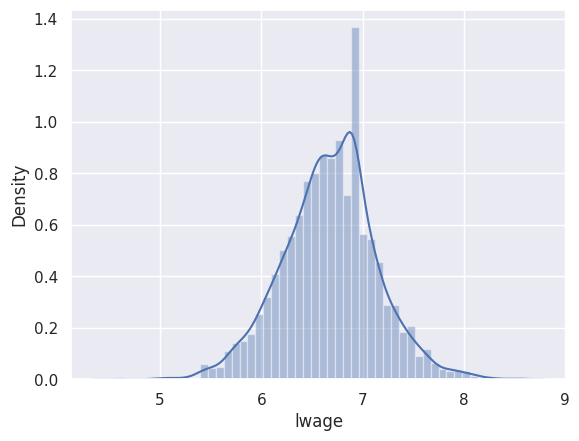

In [16]:
sns.distplot(df["lwage"])

In [17]:
#logarithmic wages variable folloe normal distribution

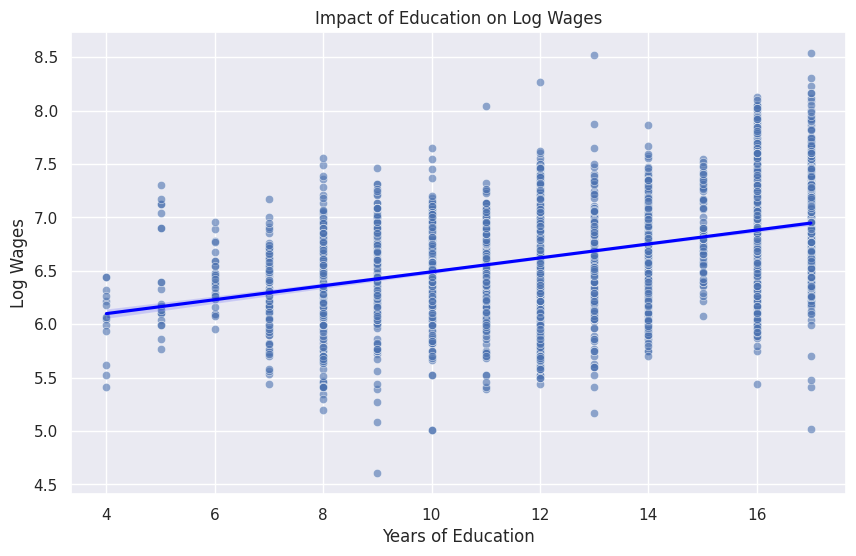

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ed'], y=df['lwage'], alpha=0.6)
sns.regplot(x='ed', y='lwage', data=df, scatter=False, color='blue')
plt.title('Impact of Education on Log Wages')
plt.xlabel('Years of Education')
plt.ylabel('Log Wages')
plt.show()

In [21]:
#Higher number of years of education compliment to higher log wages

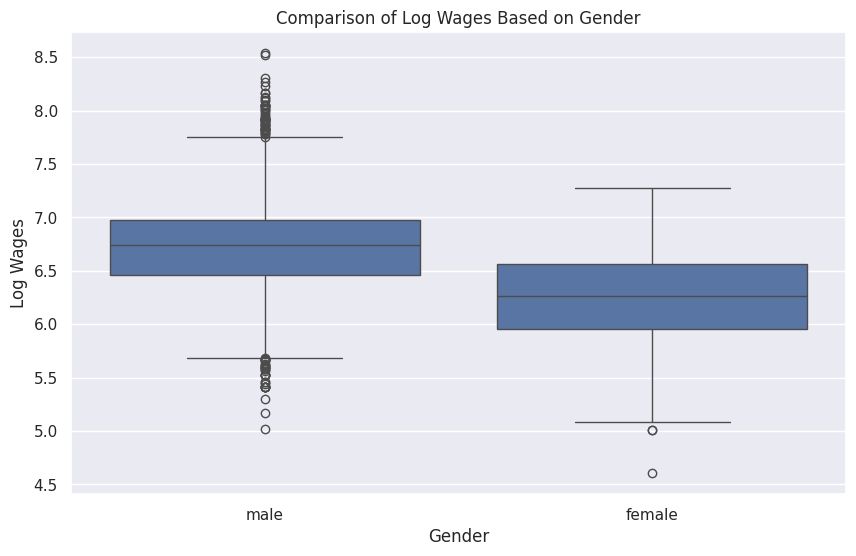

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='lwage', data=df)
plt.title('Comparison of Log Wages Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Log Wages')
plt.show()

In [23]:
#male tend to have higher median wages than female

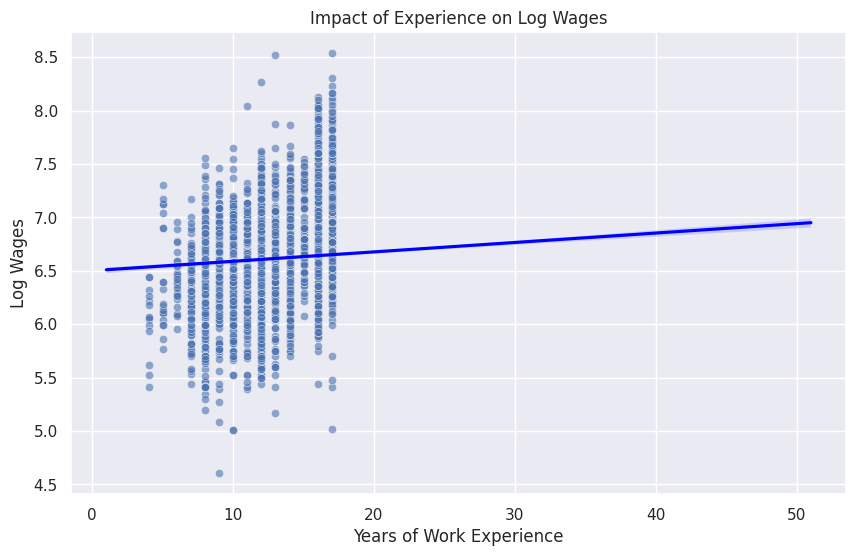

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ed'], y=df['lwage'], alpha=0.6)
sns.regplot(x='exp', y='lwage', data=df, scatter=False, color='blue')
plt.title('Impact of Experience on Log Wages')
plt.xlabel('Years of Work Experience')
plt.ylabel('Log Wages')
plt.show()

In [25]:
#Higher work experience tend to result in higher Log Wages

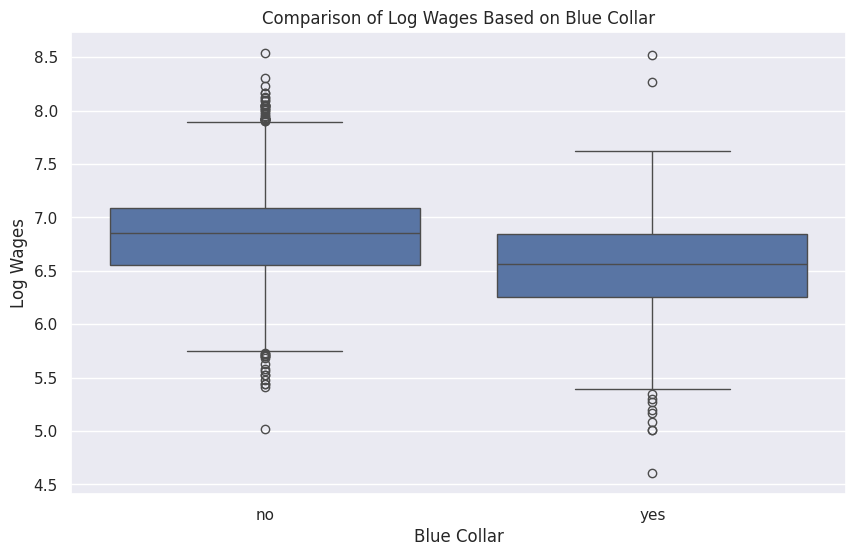

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bluecol', y='lwage', data=df)
plt.title('Comparison of Log Wages Based on Blue Collar')
plt.xlabel('Blue Collar')
plt.ylabel('Log Wages')
plt.show()

In [27]:
#People that not working in blue collar tend to have higher median wages compare to blue collar worker

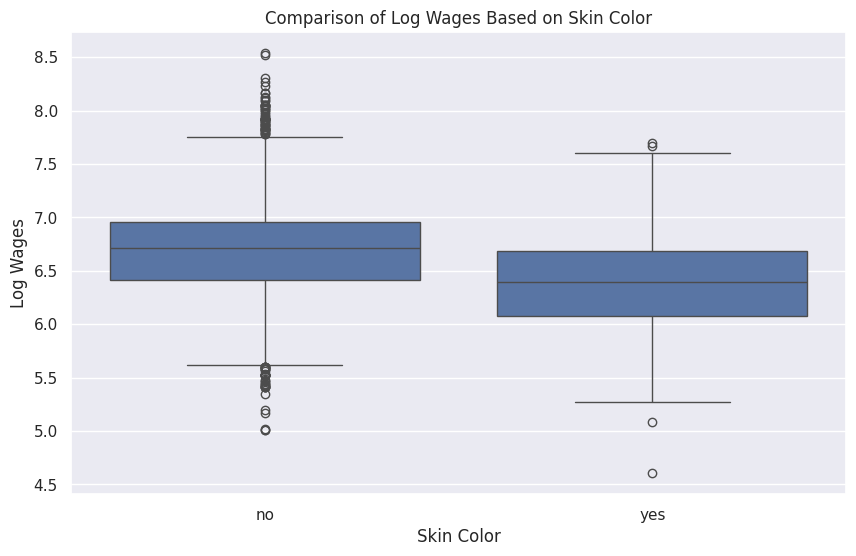

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='black', y='lwage', data=df)
plt.title('Comparison of Log Wages Based on Skin Color')
plt.xlabel('Skin Color')
plt.ylabel('Log Wages')
plt.show()

In [29]:
#People that is not black tend to have higher median wages than black color people

In [4]:
df['exp'].describe()

count    4165.000000
mean       19.853782
std        10.966370
min         1.000000
25%        11.000000
50%        18.000000
75%        29.000000
max        51.000000
Name: exp, dtype: float64

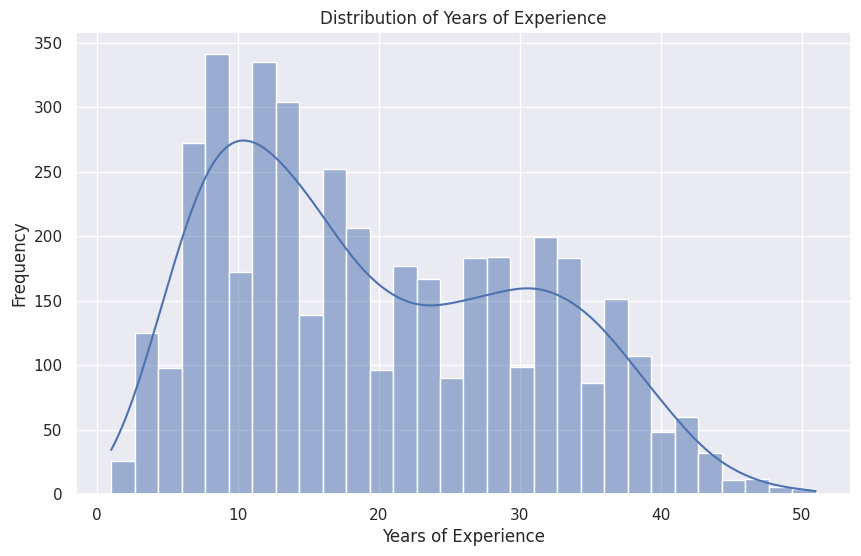

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['exp'], bins=30, kde=True)
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

In [6]:
df['wks'].describe()

count    4165.000000
mean       46.811525
std         5.129098
min         5.000000
25%        46.000000
50%        48.000000
75%        50.000000
max        52.000000
Name: wks, dtype: float64

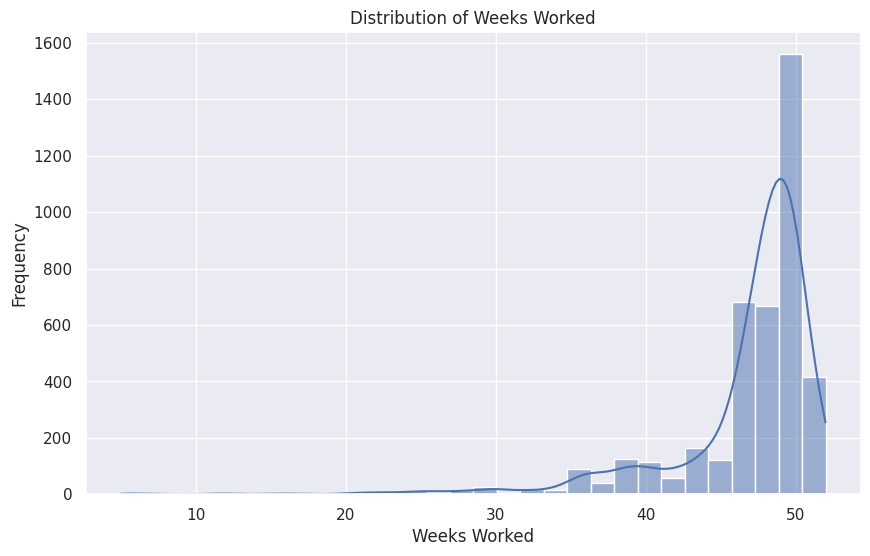

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['wks'], bins=30, kde=True)
plt.title('Distribution of Weeks Worked')
plt.xlabel('Weeks Worked')
plt.ylabel('Frequency')
plt.show()

In [15]:
bluecol_count=df['bluecol'].value_counts()
print(bluecol_count)

yes    2129
no     2036
Name: bluecol, dtype: int64


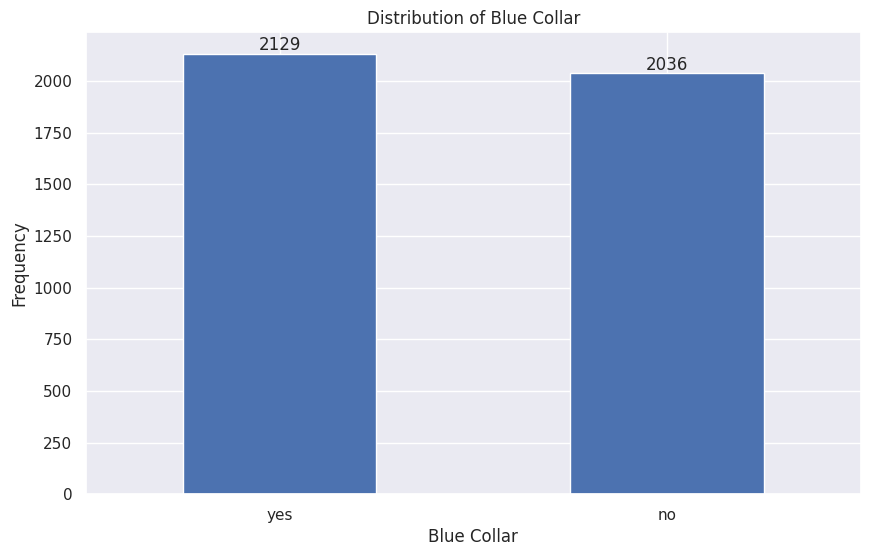

In [89]:
plt.figure(figsize=(10, 6))
bar_plot = bluecol_count.plot(kind='bar')
plt.title('Distribution of Blue Collar')
plt.xlabel('Blue Collar')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for idx, count in enumerate(bluecol_count):
    bar_plot.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

In [16]:
ind_count=df['ind'].value_counts()
print(ind_count)

0    2518
1    1647
Name: ind, dtype: int64


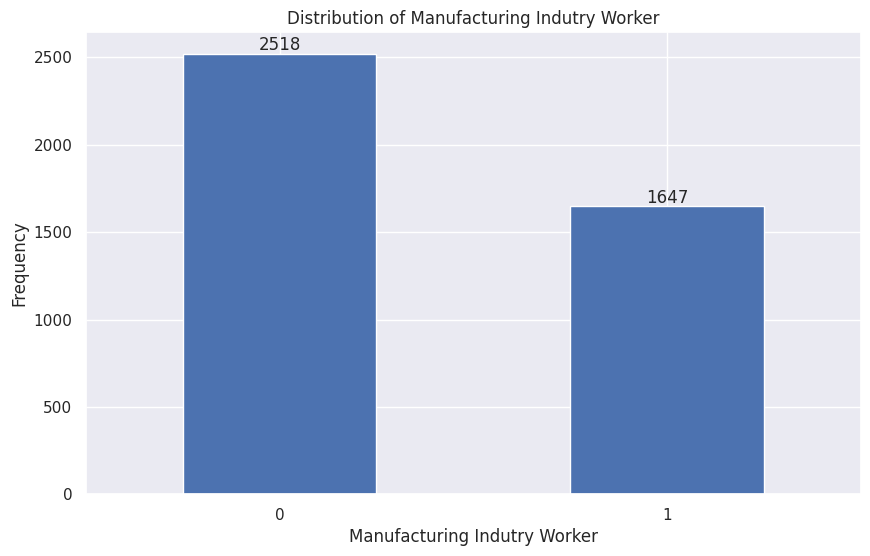

In [90]:
plt.figure(figsize=(10, 6))
bar_plot = ind_count.plot(kind='bar')
plt.title('Distribution of Manufacturing Indutry Worker')
plt.xlabel('Manufacturing Indutry Worker')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for idx, count in enumerate(ind_count):
    bar_plot.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

In [17]:
south_count=df['south'].value_counts()
print(south_count)

no     2956
yes    1209
Name: south, dtype: int64


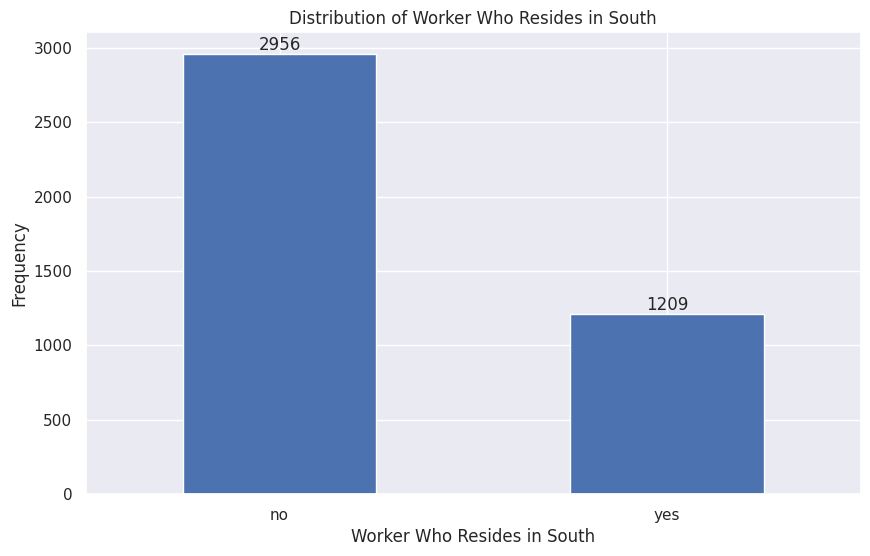

In [91]:
plt.figure(figsize=(10, 6))
bar_plot = south_count.plot(kind='bar')
plt.title('Distribution of Worker Who Resides in South')
plt.xlabel('Worker Who Resides in South')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for idx, count in enumerate(south_count):
    bar_plot.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

In [18]:
smsa_count=df['smsa'].value_counts()
print(smsa_count)

yes    2723
no     1442
Name: smsa, dtype: int64


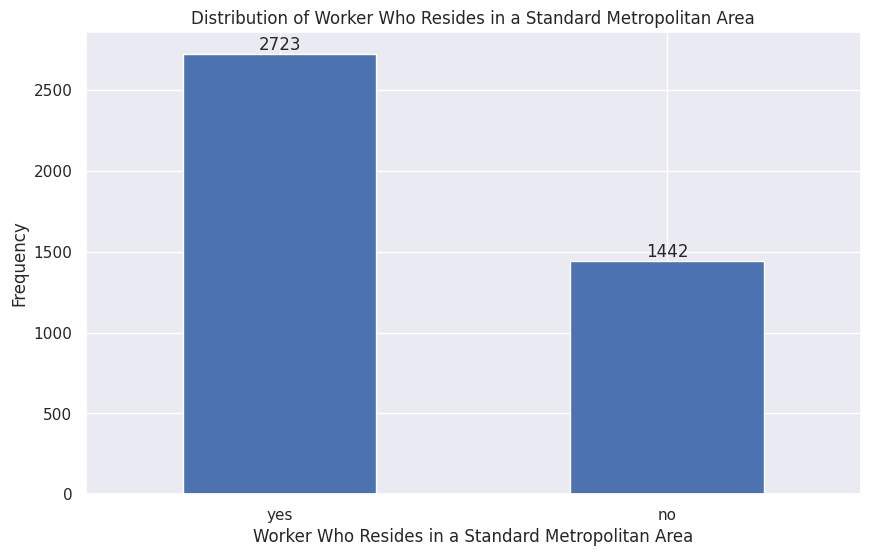

In [92]:
plt.figure(figsize=(10, 6))
bar_plot = smsa_count.plot(kind='bar')
plt.title('Distribution of Worker Who Resides in a Standard Metropolitan Area')
plt.xlabel('Worker Who Resides in a Standard Metropolitan Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for idx, count in enumerate(smsa_count):
    bar_plot.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

In [19]:
married_count=df['married'].value_counts()
print(married_count)

yes    3392
no      773
Name: married, dtype: int64


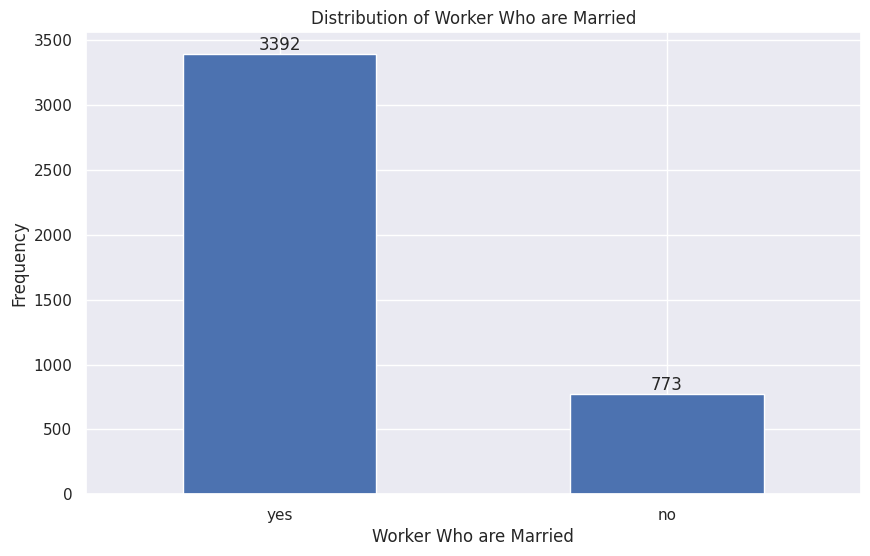

In [93]:
plt.figure(figsize=(10, 6))
bar_plot = married_count.plot(kind='bar')
plt.title('Distribution of Worker Who are Married')
plt.xlabel('Worker Who are Married')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for idx, count in enumerate(married_count):
    bar_plot.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

In [20]:
sex_count=df['sex'].value_counts()
print(sex_count)

male      3696
female     469
Name: sex, dtype: int64


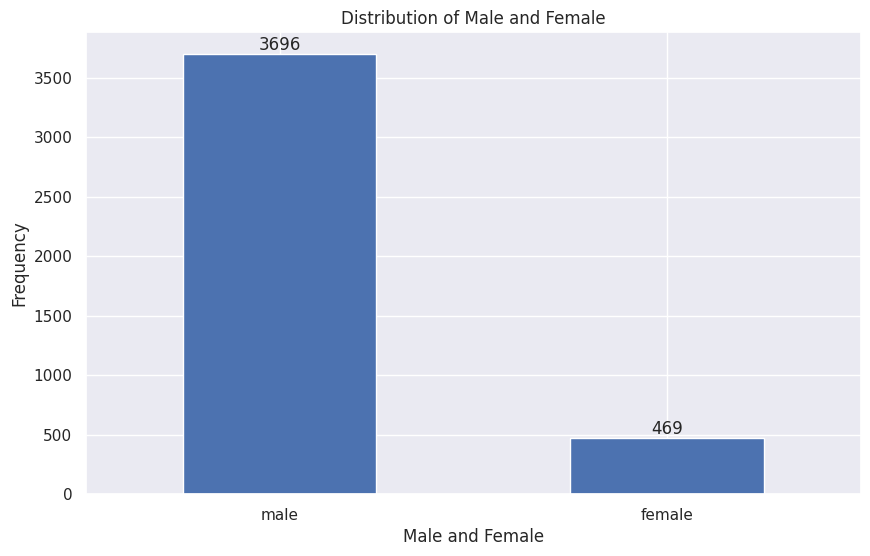

In [94]:
plt.figure(figsize=(10, 6))
bar_plot = sex_count.plot(kind='bar')
plt.title('Distribution of Male and Female')
plt.xlabel('Male and Female')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for idx, count in enumerate(sex_count):
    bar_plot.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

In [21]:
union_count=df['union'].value_counts()
print(union_count)

no     2649
yes    1516
Name: union, dtype: int64


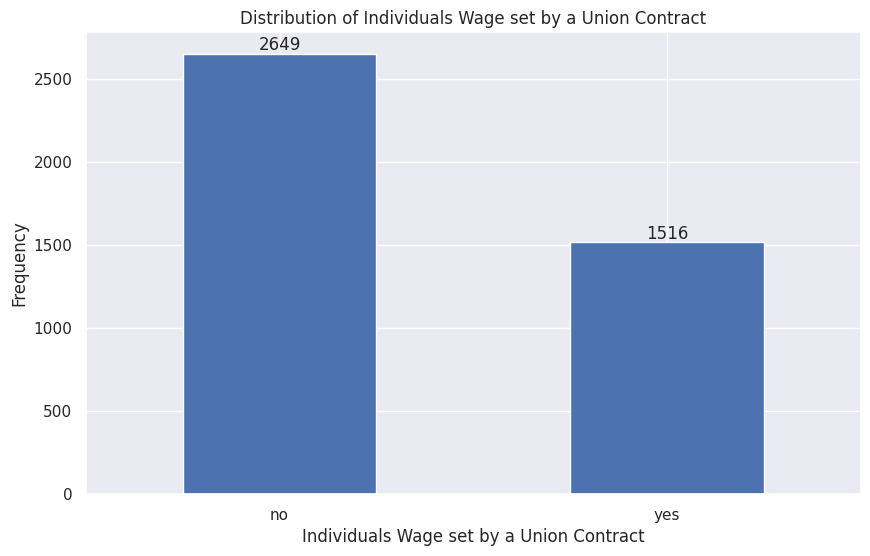

In [97]:
plt.figure(figsize=(10, 6))
bar_plot = union_count.plot(kind='bar')
plt.title('Distribution of Individuals Wage set by a Union Contract')
plt.xlabel('Individuals Wage set by a Union Contract')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for idx, count in enumerate(union_count):
    bar_plot.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

In [22]:
df['ed'].describe()

count    4165.000000
mean       12.845378
std         2.787995
min         4.000000
25%        12.000000
50%        12.000000
75%        16.000000
max        17.000000
Name: ed, dtype: float64

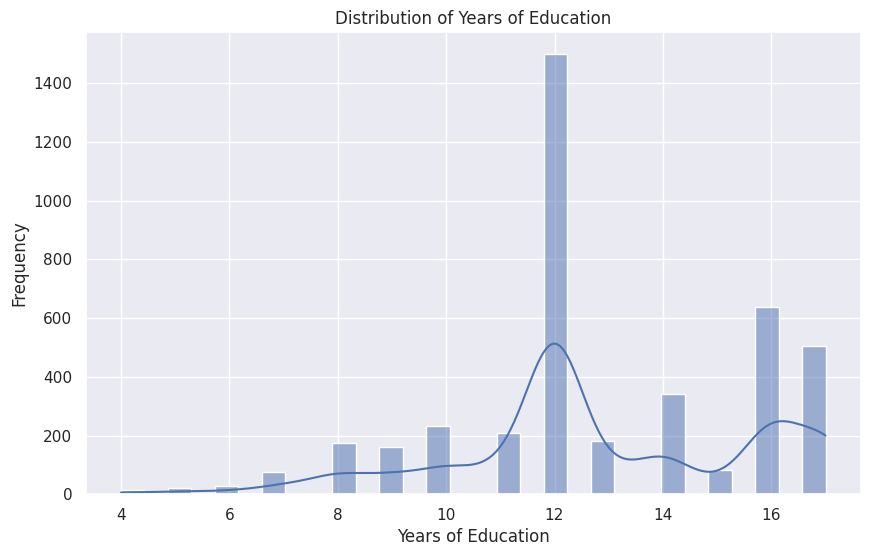

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ed'], bins=30, kde=True)
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Frequency')
plt.show()

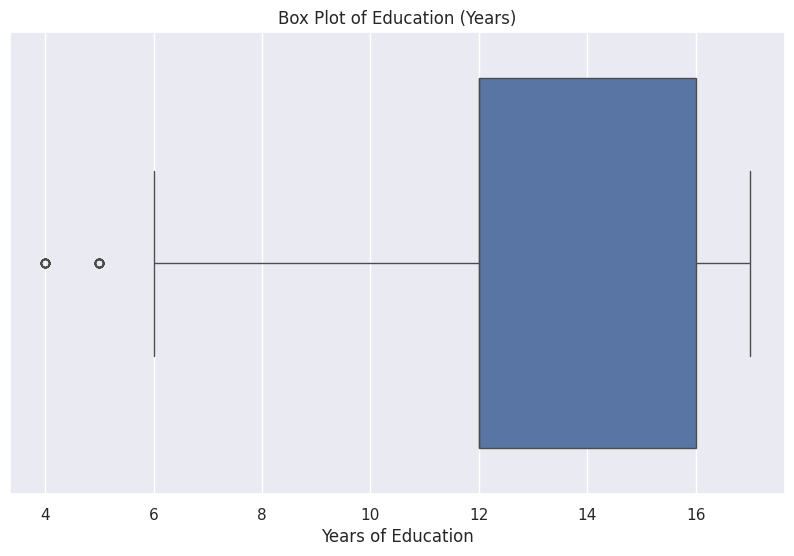

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ed'])
plt.title('Box Plot of Education (Years)')
plt.xlabel('Years of Education')
plt.show()

In [24]:
black_count=df['black'].value_counts()
print(black_count)

no     3864
yes     301
Name: black, dtype: int64


In [104]:
Q1 = df['ed'].quantile(0.25)
Q3 = df['ed'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = df[(df['ed'] >= lower_bound) & (df['ed'] <= upper_bound)]

print("Cleaned Data:")
print(data_cleaned)

Cleaned Data:
      rownames  exp  wks bluecol  ind south smsa married     sex union  ed  \
0            1    3   32      no    0   yes   no     yes    male    no   9   
1            2    4   43      no    0   yes   no     yes    male    no   9   
2            3    5   40      no    0   yes   no     yes    male    no   9   
3            4    6   39      no    0   yes   no     yes    male    no   9   
4            5    7   42      no    1   yes   no     yes    male    no   9   
...        ...  ...  ...     ...  ...   ...  ...     ...     ...   ...  ..   
4160      4161    3   50      no    0    no  yes      no  female    no  12   
4161      4162    4   49      no    0    no  yes      no  female    no  12   
4162      4163    5   50      no    0    no  yes      no  female    no  12   
4163      4164    6   50      no    0    no  yes      no  female    no  12   
4164      4165    7   50      no    0    no  yes      no  female    no  12   

     black    lwage  cluster      pca1      pca2 

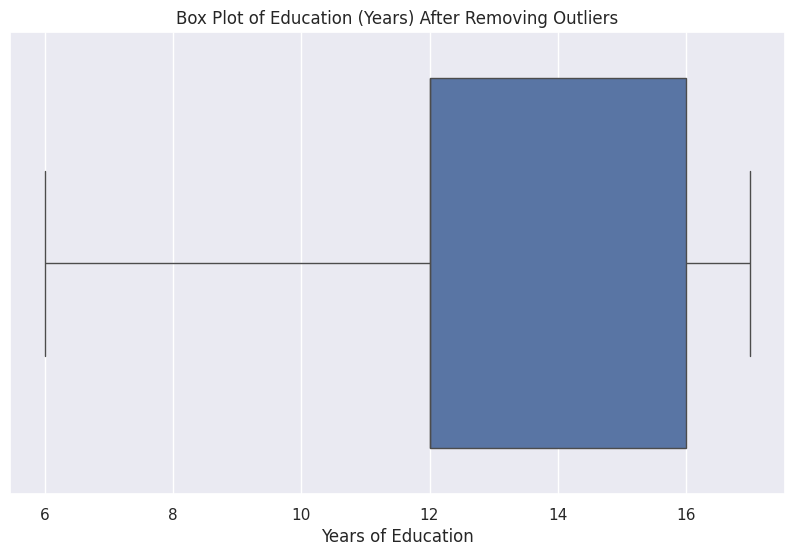

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['ed'])
plt.title('Box Plot of Education (Years) After Removing Outliers')
plt.xlabel('Years of Education')
plt.show()

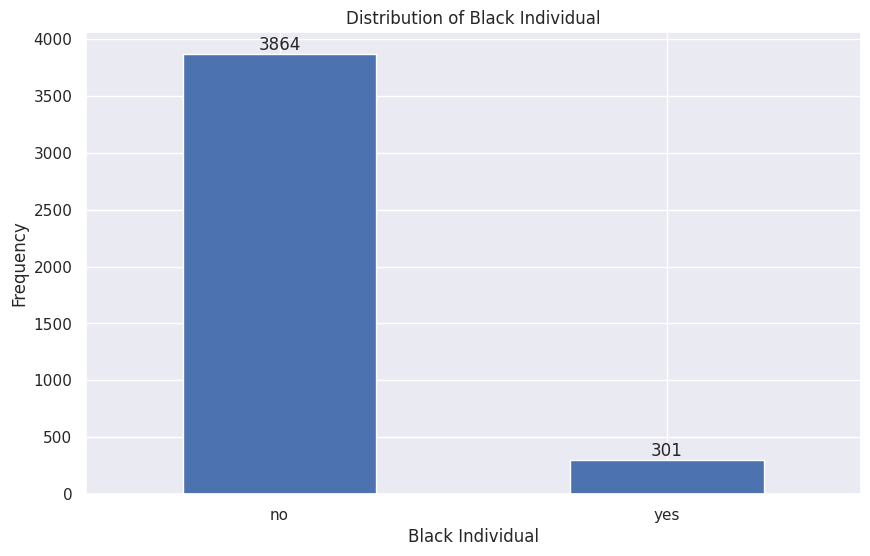

In [98]:
plt.figure(figsize=(10, 6))
bar_plot = black_count.plot(kind='bar')
plt.title('Distribution of Black Individual')
plt.xlabel('Black Individual')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for idx, count in enumerate(black_count):
    bar_plot.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

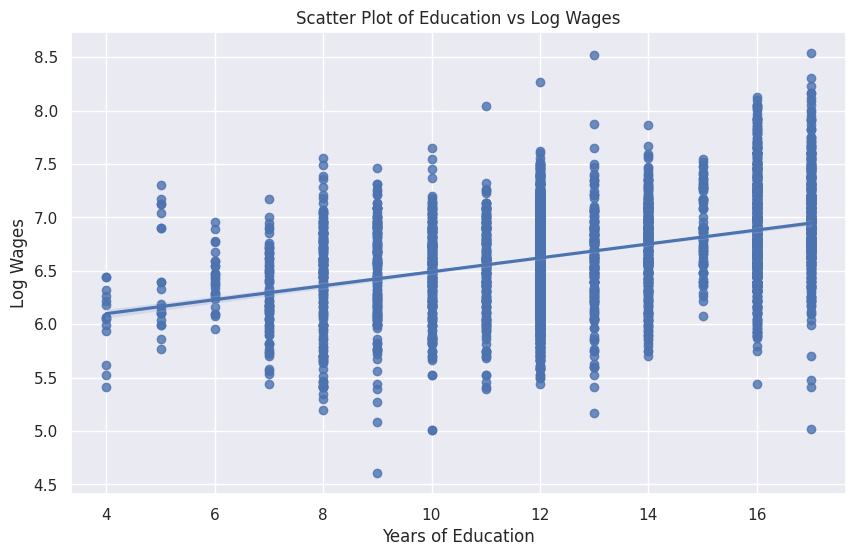

In [109]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['ed'], y=df['lwage'])
plt.title('Scatter Plot of Education vs Log Wages')
plt.xlabel('Years of Education')
plt.ylabel('Log Wages')
plt.show()


In [111]:
from scipy.stats import pearsonr

In [112]:
correlation, p_value = pearsonr(df['ed'], df['lwage'])
print(f'Correlation coefficient: {correlation}, P-value: {p_value}')

Correlation coefficient: 0.3938960639287754, P-value: 1.2123312383767494e-154


In [116]:
X = df[['ed']]
y = df['lwage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
from sklearn.linear_model import LinearRegression

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary())


Mean Squared Error: 0.1854569321553163
R-squared: 0.19072803510330427
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     564.6
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          2.04e-115
Time:                        22:18:53   Log-Likelihood:                -1858.1
No. Observations:                3332   AIC:                             3720.
Df Residuals:                    3330   BIC:                             3732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [114]:
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     764.5
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          1.21e-154
Time:                        22:10:02   Log-Likelihood:                -2337.7
No. Observations:                4165   AIC:                             4679.
Df Residuals:                    4163   BIC:                             4692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8388      0.031    188.367      0.0

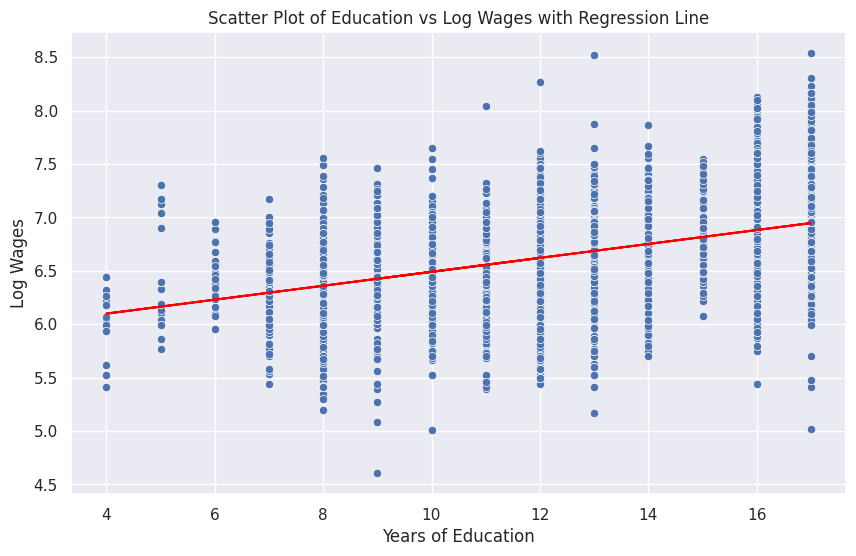

In [115]:
X = df['ed']
y = df['lwage']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ed'], y=df['lwage'])
plt.plot(df['ed'], predictions, color='red')
plt.title('Scatter Plot of Education vs Log Wages with Regression Line')
plt.xlabel('Years of Education')
plt.ylabel('Log Wages')
plt.show()

In [25]:
df['lwage'].describe()

count    4165.000000
mean        6.676346
std         0.461512
min         4.605170
25%         6.395260
50%         6.684610
75%         6.952730
max         8.537000
Name: lwage, dtype: float64

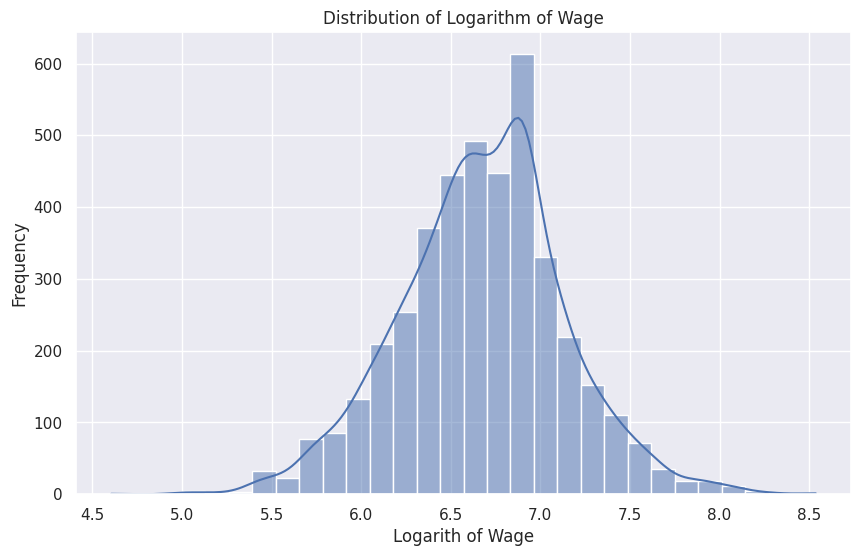

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lwage'], bins=30, kde=True)
plt.title('Distribution of Logarithm of Wage')
plt.xlabel('Logarith of Wage')
plt.ylabel('Frequency')
plt.show()

In [27]:
corr=df.corr()

<ipython-input-27-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


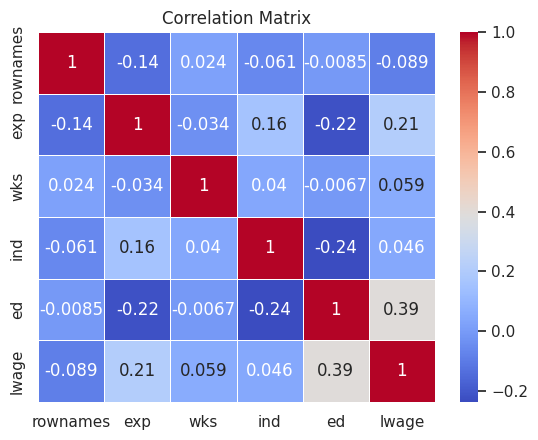

In [29]:
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)


plt.title('Correlation Matrix')
plt.show()

In [30]:
df.columns

Index(['rownames', 'exp', 'wks', 'bluecol', 'ind', 'south', 'smsa', 'married',
       'sex', 'union', 'ed', 'black', 'lwage'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  4165 non-null   int64  
 1   exp       4165 non-null   int64  
 2   wks       4165 non-null   int64  
 3   bluecol   4165 non-null   object 
 4   ind       4165 non-null   int64  
 5   south     4165 non-null   object 
 6   smsa      4165 non-null   object 
 7   married   4165 non-null   object 
 8   sex       4165 non-null   object 
 9   union     4165 non-null   object 
 10  ed        4165 non-null   int64  
 11  black     4165 non-null   object 
 12  lwage     4165 non-null   float64
dtypes: float64(1), int64(5), object(7)
memory usage: 309.2+ KB


In [32]:
df_new=df.drop(['rownames','bluecol','south','smsa','married','sex','union','black'], axis=1)

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exp     4165 non-null   int64  
 1   wks     4165 non-null   int64  
 2   ind     4165 non-null   int64  
 3   ed      4165 non-null   int64  
 4   lwage   4165 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 162.8 KB


<AxesSubplot:>

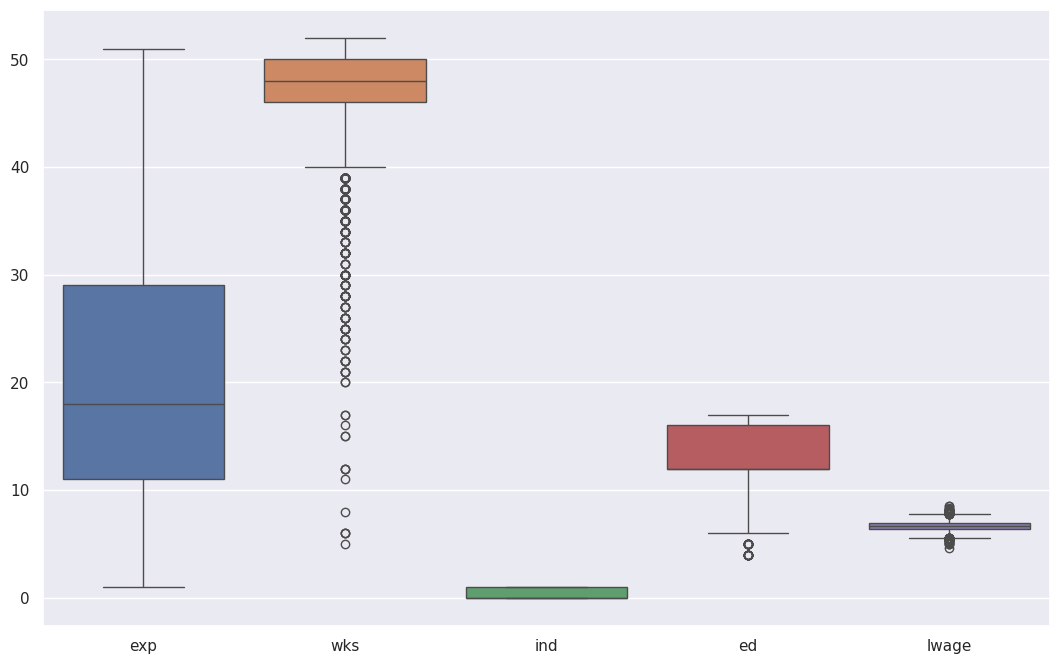

In [35]:
fig ,ax  = plt.subplots(figsize = (13,8))
sns.boxplot(data = df_new , ax =  ax)

In [36]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
Q1,Q3

(exp      11.00000
 wks      46.00000
 ind       0.00000
 ed       12.00000
 lwage     6.39526
 Name: 0.25, dtype: float64,
 exp      29.00000
 wks      50.00000
 ind       1.00000
 ed       16.00000
 lwage     6.95273
 Name: 0.75, dtype: float64)

In [37]:
IQR = Q3 - Q1
IQR

exp      18.00000
wks       4.00000
ind       1.00000
ed        4.00000
lwage     0.55747
dtype: float64

In [38]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(exp     -16.000000
 wks      40.000000
 ind      -1.500000
 ed        6.000000
 lwage     5.559055
 dtype: float64,
 exp      56.000000
 wks      56.000000
 ind       2.500000
 ed       22.000000
 lwage     7.788935
 dtype: float64)

In [39]:
df_new[(df_new < lower_limit) |(df_new > upper_limit) ]

,exp,wks,ind,ed,lwage
0,NaN,32.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,39.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
4160,NaN,NaN,NaN,NaN,NaN
4161,NaN,NaN,NaN,NaN,NaN
4162,NaN,NaN,NaN,NaN,NaN
4163,NaN,NaN,NaN,NaN,NaN


In [40]:
df_new = df_new[(df_new > lower_limit) & (df_new < upper_limit) ]

In [41]:
df_new

,exp,wks,ind,ed,lwage
0,3,NaN,0,9.0,5.56068
1,4,43.0,0,9.0,5.72031
2,5,NaN,0,9.0,5.99645
3,6,NaN,0,9.0,5.99645
4,7,42.0,1,9.0,6.06146
...,...,...,...,...,...
4160,3,50.0,0,12.0,5.95324
4161,4,49.0,0,12.0,6.06379
4162,5,50.0,0,12.0,6.21461
4163,6,50.0,0,12.0,6.29157


In [42]:
threshold = 0.7

df_new = df_new[df_new.columns[df_new.isnull().mean() < threshold]]


df_new = df_new.loc[df_new.isnull().mean(axis=1) < threshold]

df_new

,exp,wks,ind,ed,lwage
0,3,NaN,0,9.0,5.56068
1,4,43.0,0,9.0,5.72031
2,5,NaN,0,9.0,5.99645
3,6,NaN,0,9.0,5.99645
4,7,42.0,1,9.0,6.06146
...,...,...,...,...,...
4160,3,50.0,0,12.0,5.95324
4161,4,49.0,0,12.0,6.06379
4162,5,50.0,0,12.0,6.21461
4163,6,50.0,0,12.0,6.29157


In [43]:
df_new.isnull().sum()

exp        0
wks      447
ind        0
ed        63
lwage     95
dtype: int64

In [44]:
df_new['wks'] = df_new["wks"].fillna(df_new['wks'].median())
df_new['ed'] = df_new["ed"].fillna(df_new['ed'].median())
df_new['lwage'] = df_new["lwage"].fillna(df_new['lwage'].median())

df_new.head()

,exp,wks,ind,ed,lwage
0,3,49.0,0,9.0,5.56068
1,4,43.0,0,9.0,5.72031
2,5,49.0,0,9.0,5.99645
3,6,49.0,0,9.0,5.99645
4,7,42.0,1,9.0,6.06146


In [45]:
df_new.describe()

,exp,wks,ind,ed,lwage
count,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000
mean,19.853782,48.344778,0.395438,12.947899,6.673592
std,10.966370,2.116271,0.489003,2.623862,0.416540
min,1.000000,41.000000,0.000000,7.000000,5.560680
25%,11.000000,47.000000,0.000000,12.000000,6.396930
50%,18.000000,49.000000,0.000000,12.000000,6.684610
75%,29.000000,50.000000,1.000000,16.000000,6.925600
max,51.000000,52.000000,1.000000,17.000000,7.783220


In [46]:
df_new.isnull().sum()

exp      0
wks      0
ind      0
ed       0
lwage    0
dtype: int64

<AxesSubplot:>

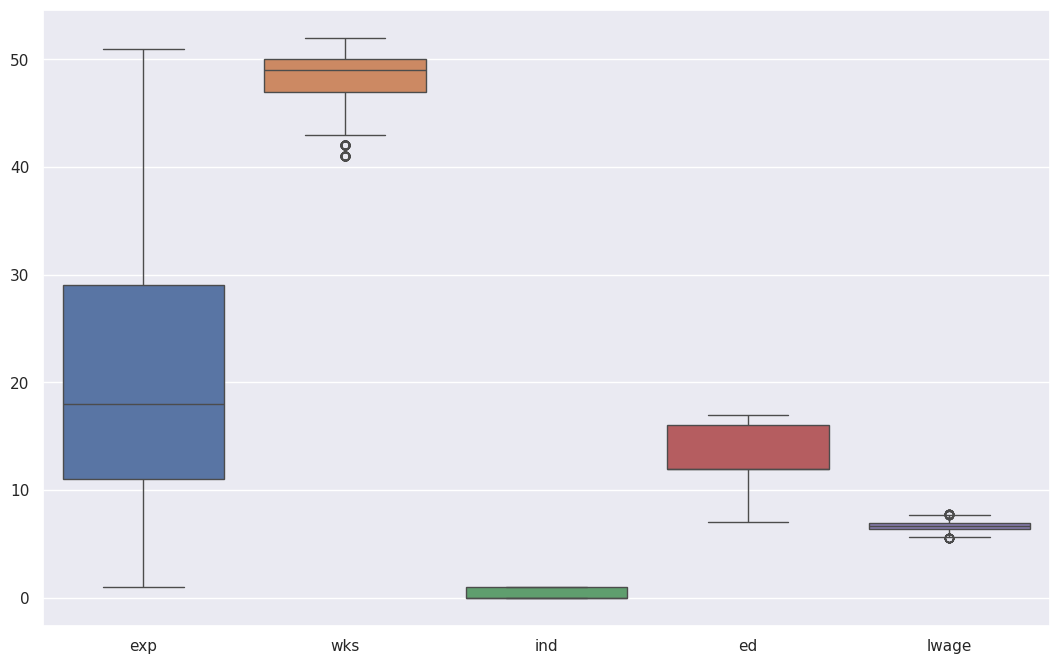

In [47]:
fig ,ax  = plt.subplots(figsize = (13,8))
sns.boxplot(data = df_new , ax = ax)

In [55]:
y = df_new['lwage']
y

0       5.56068
1       5.72031
2       5.99645
3       5.99645
4       6.06146
         ...   
4160    5.95324
4161    6.06379
4162    6.21461
4163    6.29157
4164    6.37161
Name: lwage, Length: 4165, dtype: float64

In [56]:
X = df_new.drop(columns=['lwage'])
X

,exp,wks,ind,ed
0,3,49.0,0,9.0
1,4,43.0,0,9.0
2,5,49.0,0,9.0
3,6,49.0,0,9.0
4,7,42.0,1,9.0
...,...,...,...,...
4160,3,50.0,0,12.0
4161,4,49.0,0,12.0
4162,5,50.0,0,12.0
4163,6,50.0,0,12.0


In [57]:
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X))

<AxesSubplot:>

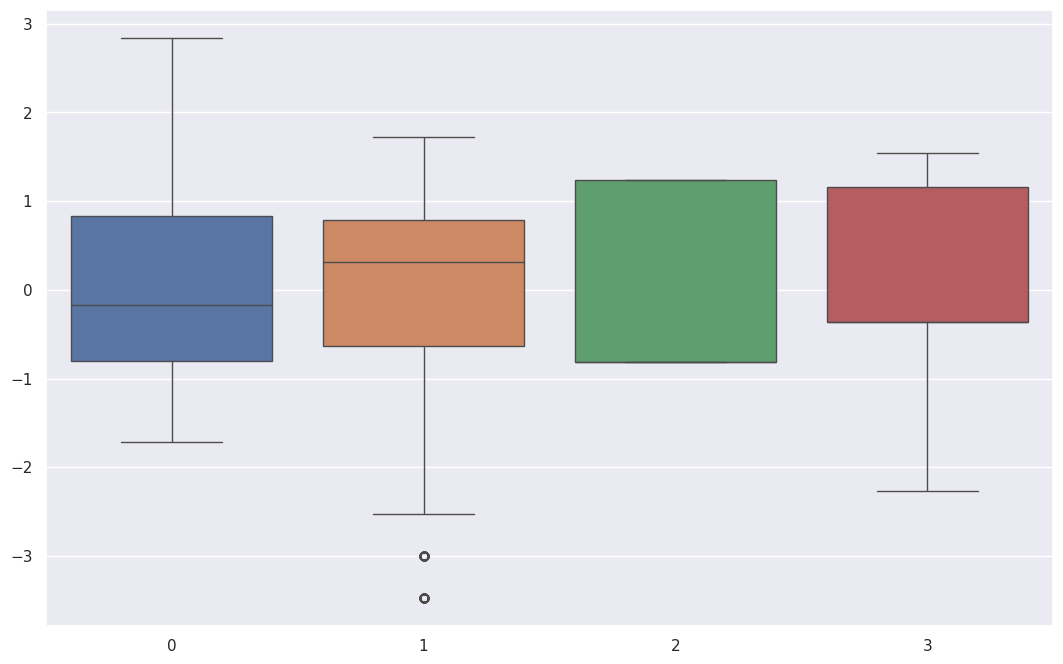

In [58]:
fig ,ax  = plt.subplots(figsize = (13,8))
sns.boxplot(data = X_scaled , ax = ax)

<AxesSubplot:>

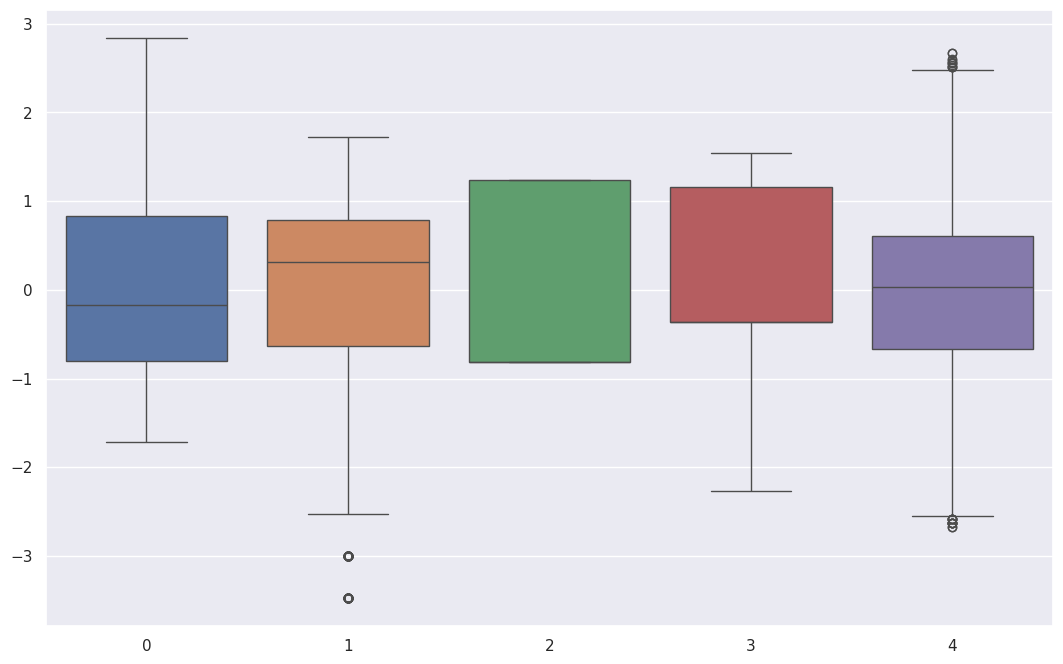

In [60]:
train_scaled = pd.DataFrame(scalar.fit_transform(df_new))
fig ,ax  = plt.subplots(figsize = (13,8))
sns.boxplot(data = train_scaled , ax = ax)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size = 0.3 , random_state = 100)

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2915, 4)
(1250, 4)
(2915,)
(1250,)


In [63]:
model = DecisionTreeRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [64]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

0.3510484153111111


In [65]:
y_pred

array([7.17012 , 6.59696 , 7.232845, ..., 6.31897 , 5.57973 , 6.761475])

In [66]:
y_test

1299    7.48829
2047    6.55678
828     6.68461
2642    6.80239
4124    6.53379
         ...   
1384    7.08841
3592    6.90575
2238    6.44572
1409    6.10702
2817    7.13090
Name: lwage, Length: 1250, dtype: float64

In [67]:
print(y_pred.mean())
y_pred_perc = y_pred.mean()

6.652729842220645


In [69]:
print(y_test.mean())
y_test_perc = y_test.mean()

6.661203928


In [70]:
off_percentage = 100-(y_pred_perc/y_test_perc)*100
print(off_percentage)

0.12721552846826967


In [72]:
from sklearn.cluster import KMeans

In [75]:
from sklearn.decomposition import PCA

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


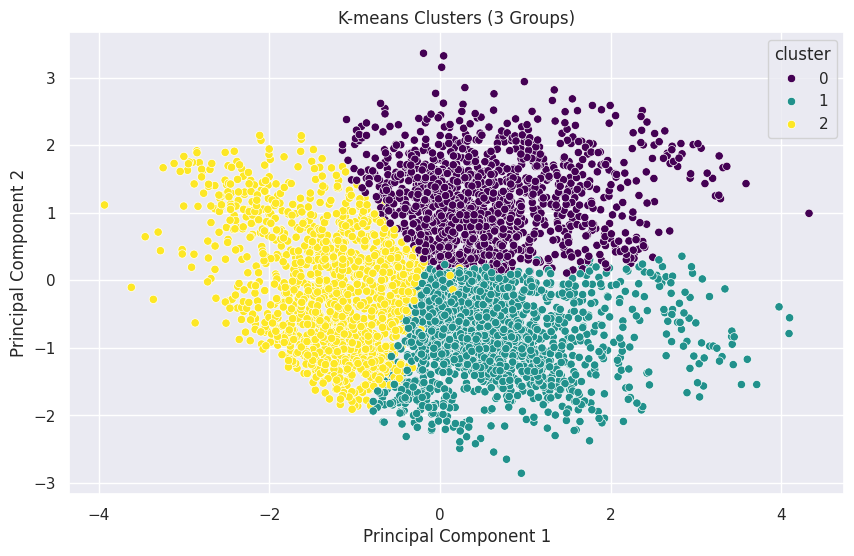

In [123]:
numerical_features = df[['exp', 'wks', 'ed', 'lwage']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df['pca1'] = principal_components[:, 0]
df['pca2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clusters (3 Groups)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [124]:
from scipy.stats import norm

N = len(df)
Z = norm.ppf(0.975)
p = 0.5
E = 0.05

numerator = N * (Z**2) * p * (1-p)
denominator = (E**2) * (N - 1) + (Z**2) * p * (1-p)
sample_size = numerator / denominator

sample_size = int(sample_size) + 1

sample_size

352

In [125]:
sample_size = 352

random_sample = df.sample(n=sample_size, random_state=42)

print(random_sample)

      rownames  exp  wks bluecol  ind south smsa married     sex union  ed  \
1937      1938   38   47     yes    0   yes   no     yes    male    no   8   
1543      1544   31   45      no    0    no  yes     yes    male   yes  17   
3380      3381   13   47      no    0   yes  yes      no    male   yes  14   
2453      2454   26   51     yes    1    no   no     yes    male   yes   8   
2522      2523    7   20      no    0    no  yes      no  female    no  17   
...        ...  ...  ...     ...  ...   ...  ...     ...     ...   ...  ..   
93          94   17   45      no    0   yes  yes     yes    male    no  17   
3422      3423   37   51      no    0   yes  yes     yes    male    no  12   
1340      1341    9   15      no    1    no  yes     yes    male   yes  12   
2495      2496   19   48     yes    1    no  yes     yes    male   yes  12   
23          24   33   46     yes    0    no  yes      no  female    no  10   

     black    lwage  cluster      pca1      pca2  
1937    no  

In [126]:
random_sample.describe()

,rownames,exp,wks,ind,ed,lwage,cluster,pca1,pca2
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,2056.539773,19.187500,46.735795,0.369318,13.014205,6.671232,1.096591,-0.035361,-0.075742
std,1223.496295,10.634249,5.692107,0.483307,2.773978,0.471583,0.778478,1.225378,1.056440
min,9.000000,1.000000,6.000000,0.000000,4.000000,5.010640,0.000000,-3.452791,-2.375270
25%,1068.750000,10.000000,46.750000,0.000000,12.000000,6.358270,0.000000,-1.083186,-0.874209
50%,2008.500000,17.000000,48.000000,0.000000,12.000000,6.663130,1.000000,0.065190,-0.215710
75%,3086.000000,28.000000,50.000000,1.000000,16.000000,6.934150,2.000000,0.800766,0.771600
max,4165.000000,48.000000,52.000000,1.000000,17.000000,8.229510,2.000000,3.533591,2.447134


In [84]:
from sklearn.model_selection import train_test_split

# Define the sample size
sample_size = 352

# Perform stratified sampling based on 'sex'
stratified_sample, _ = train_test_split(df, test_size=(len(df) - sample_size) / len(df), stratify=df['sex'], random_state=42)

# Display the stratified sample
print(stratified_sample)


      rownames  exp  wks bluecol  ind south smsa married     sex union  ed  \
4090      4091    7   48      no    0    no  yes     yes    male    no  16   
2837      2838    5   48     yes    1    no  yes     yes    male   yes  13   
1955      1956   31   51     yes    0    no  yes     yes    male   yes  13   
1879      1880   24   51     yes    1    no   no      no    male   yes   9   
2233      2234   20   50     yes    1   yes  yes     yes    male    no   6   
...        ...  ...  ...     ...  ...   ...  ...     ...     ...   ...  ..   
546        547   10   50     yes    0    no   no      no  female    no   8   
572        573   27   50     yes    0   yes   no     yes    male   yes  12   
3159      3160   11   47     yes    1    no  yes      no  female    no  12   
1152      1153   41   40     yes    1    no   no     yes    male   yes  12   
3990      3991    8   50     yes    0    no  yes     yes    male   yes  12   

     black    lwage  cluster      pca1      pca2  
4090    no  